In [1]:
# This is query for the Miners Distance template
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
# Path for all the results
path="/mnt/indexer-build/migrated_data/casper_data/curated/miner_dist"

In [3]:
def extractorYear(year):
    return(int(str(year)[:4]))

def extractorWeek(year):
    return(int(str(year)[4:]))

In [4]:
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [5]:
frame.iloc[0:8,:]

,id,distances,year_week,norm_balance
0,0167e08c3b05017d329444dc7d22518ba652cecb2c5466...,0,202138,1.250346e-05
1,0119836d53dad3dcbedf4bdbe40d5faeb1a37fd43b7bcd...,1,202138,1.962741e-04
2,013725fe8df379be1e1cc8c571fc4d21b584dc8bb12600...,0,202131,6.049990e-07
3,020233860b2c5d9d24cce3135a23d1583df91b839efb2b...,1,202131,5.493116e-06
4,01efd971ab7557b0e8e87f9c6627c3de1ba5ebc4e593ce...,2,202132,0.000000e+00
5,0121466731d568f837588db2a299f8c2e758ed87432505...,4,202132,1.136706e-07
6,01e20851f8ed42699919378fb6fd6c2ad1709c8b081da8...,2,202132,0.000000e+00
7,012a866d7d5471f3c8d4f1820b7ee23d9275dc104b276c...,4,202132,0.000000e+00


In [6]:
start = 0
end = 8 

mean = frame.groupby('distances')['norm_balance'].mean()[start:end]
std = frame.groupby('distances')['norm_balance'].std()[start:end]
p025 = frame.groupby('distances')['norm_balance'].quantile(0.025)[start:end]
p975 = frame.groupby('distances')['norm_balance'].quantile(0.975)[start:end]

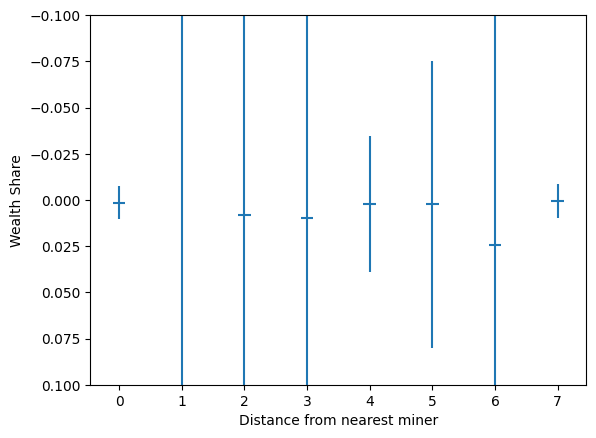

<Figure size 1200x700 with 0 Axes>

In [11]:
from cmath import log
import numpy as np

plt.errorbar(
    mean.index,
    mean,
    xerr=0.1,
    # yerr= [mean - p025, p975 - mean],
    # yerr=[np.log(1+(mean-p025)), np.log(1+(p975-mean))],
    yerr = std*2,
    linestyle='',
)
plt.ylim([0.1,-0.1])
plt.xlabel("Distance from nearest miner")
plt.ylabel("Wealth Share")
plt.figure(figsize=(12,7))
plt.show()
